In [ ]:
import pandas as pd
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', None)


# Función para obtener los atributos del grafo
def obtener_atributos(grafo,datos,num_top):
    notas = []
    for x in datos[:num_top]:
        notas.append(x[0])
    atributos = []
    for a in list(grafo.nodes.data(True)):
        for x in notas:
            if a[0]==x:
                atributos.append(a[1])
    df_atributos = pd.DataFrame(atributos)
    return df_atributos

# Función para obtener los atributos del grafo
def crear_grafico_colores(grafo,datos,titulo):
    plt.figure(figsize=(15, 10))
    nx.draw(
            gestion, pos = nx.spring_layout(grafo, seed=30),
            node_color=list(datos.values()), with_labels=False,
            node_size=[v * 2 for v in dict(grafo.degree()).values()],
            cmap=plt.cm.plasma
           )
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label='')
    plt.title(titulo,fontsize = 20)
    plt.show()

In [ ]:
#Crear el grafo
gestion = nx.read_graphml('gestion.graphml')

In [ ]:
pagerank = nx.pagerank(gestion)
#print(sorted(pagerank.items(), key=lambda item:item[1], reverse=True))
pagerank_ordenado = [(k,v) for k,v in sorted(pagerank.items(), key=lambda item:item[1], reverse=True)]
#print(pagerank_ordenado)
# top 20 nodos
print("Top 20 nodos con mejor ranking")
pagerank_ordenado[:20]

Top 20 nodos con mejor ranking


[('3JEDLCH7BRABDLGZBRSNZXD2MQ', 0.0028746265117026407),
 ('E5SQTJ657FED7ENFIP4DYGR2YU', 0.002334351603252662),
 ('ASTNNL5FQRCZ3HBPEWM76TUQHQ', 0.0022467955105107988),
 ('NONTYXHHRRAAVNSXMW3WFYSQNI', 0.0022315653053516606),
 ('KC3R6MQ32BAJLFPL73WCEWHOBA', 0.002210914352662058),
 ('Q37PDBDCGJGSNOK5RN6GQUNZZI', 0.002032199360843529),
 ('G3VCQKAQXFB3XCKOBBYG67MRBY', 0.0020309033693356533),
 ('NJEUGULRVFHCXH5DI6MMKRQPLI', 0.0019365652075275927),
 ('TFZU4WLDJ5C67OTSEFAJETLCPY', 0.0018797138095995789),
 ('WHTP744VOJDCVER4AUUMA6HCDM', 0.0018539299068539429),
 ('4EY42N4KAFFEBHET3JWAHSK3WI', 0.0018313160416176828),
 ('SXM7ZWLS2BHODIRK5IISDBH4ME', 0.001789507720620836),
 ('JBYPSRFPQ5HOVFNPIHHBT4U5WA', 0.0017705396556047242),
 ('TG4HDU5NNRHEXIBDWSQL5UOQZE', 0.0017284408701787538),
 ('ADSHBJZZ4VEOXGXRMDYSZXYBRQ', 0.0017201016609544682),
 ('FDYMSVHLSVDKVJPU3BN73SFNPI', 0.0017107448102766877),
 ('BHGF4ZFKVBAFNORISBNFU2YFFU', 0.0016986051286445104),
 ('IAB3BMNMRNCI7LZ3XQ7ZHW3Y2U', 0.001697649528917587

In [ ]:
pagerank_atributos = obtener_atributos(gestion,pagerank_ordenado,20)
pagerank_atributos

,categoria,subcategoria,tipo_contenido,autor,titulo,caracteres
0,Tu dinero,Inmobiliarias,premium,José Carlos Reyes Leyva,Los tres distritos donde la inversión de un inmueble para alquiler se recupera más rápido,4561
1,Economia,Empresas,premium,Alejandro Milla,Análisis: fortuna de las 17 familias más ricas de Perú supera los US$24.000M en 2023,6666
2,Economia,Economia,premium,Omar Manrique,"Municipalidad de Lima toma deuda cara, ¿comprometerá a siguientes alcaldes?",5725
3,Peru,Politica,premium,Yuriko Cabeza,Alberto Fujimori: las consecuencias que conlleva su excarcelación,5817
4,Economia,Management & empleo,premium,José Carlos Reyes Leyva,Los cinco cambios laborales más relevantes del 2023: impactos en empresas y trabajadores,4929
5,Economia,Empresas,premium,Mayumi García,Surquillo y la apuesta gastronómica que abarcará a 30 cuadras del distrito,5057
6,Economia,Empresas,premium,Karen Guardia Quispe,Aumenta la demanda peruana en el Terminal Portuario de Arica,2969
7,Tu dinero,Finanzas personales,premium,Zulema Ramirez Huancayo,Empresas aportarían a fondo de pensiones de trabajadores en AFP y ONP,4939
8,Tu dinero,Tu dinero,premium,José Carlos Reyes Leyva,"Cinco cambios tributarios relevantes del 2023, a tener en cuenta por empresas y trabajadores",6331
9,Economia,Empresas,premium,Ani Lu Torres,Las 14 regulaciones empresariales que estarán en la agenda este 2024,360


from matplotlib import pyplot as plt
pagerank_atributos['caracteres'].plot(kind='hist', bins=20, title='caracteres')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
pagerank_atributos.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
pagerank_atributos.groupby('tipo_contenido').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pagerank_atributos['caracteres'].plot(kind='line', figsize=(8, 4), title='caracteres')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_contenido'].value_counts()
    for x_label, grp in pagerank_atributos.groupby('categoria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('categoria')
_ = plt.ylabel('tipo_contenido')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pagerank_atributos['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pagerank_atributos, x='caracteres', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pagerank_atributos['tipo_contenido'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pagerank_atributos, x='caracteres', y='tipo_contenido', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

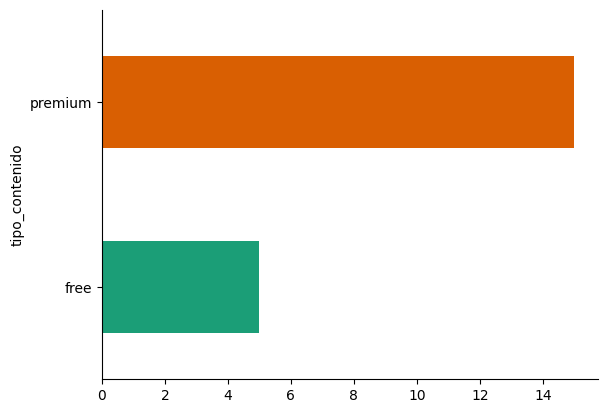

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pagerank_atributos.groupby('tipo_contenido').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

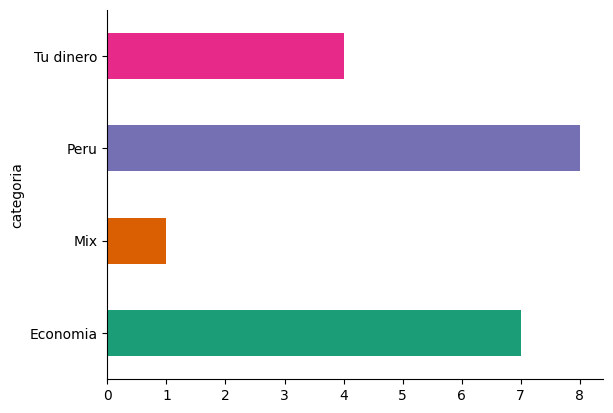

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pagerank_atributos.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

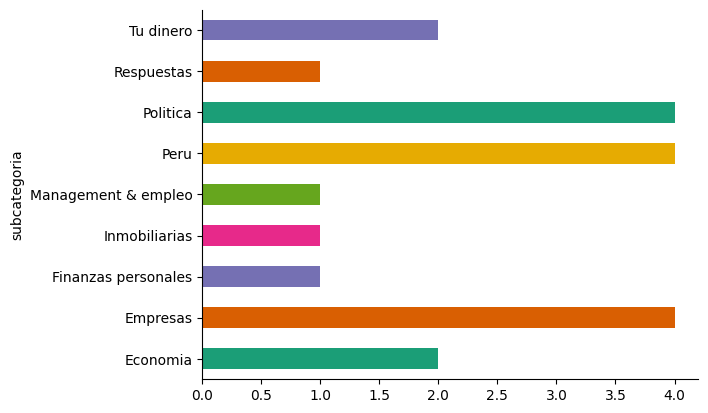

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pagerank_atributos.groupby('subcategoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

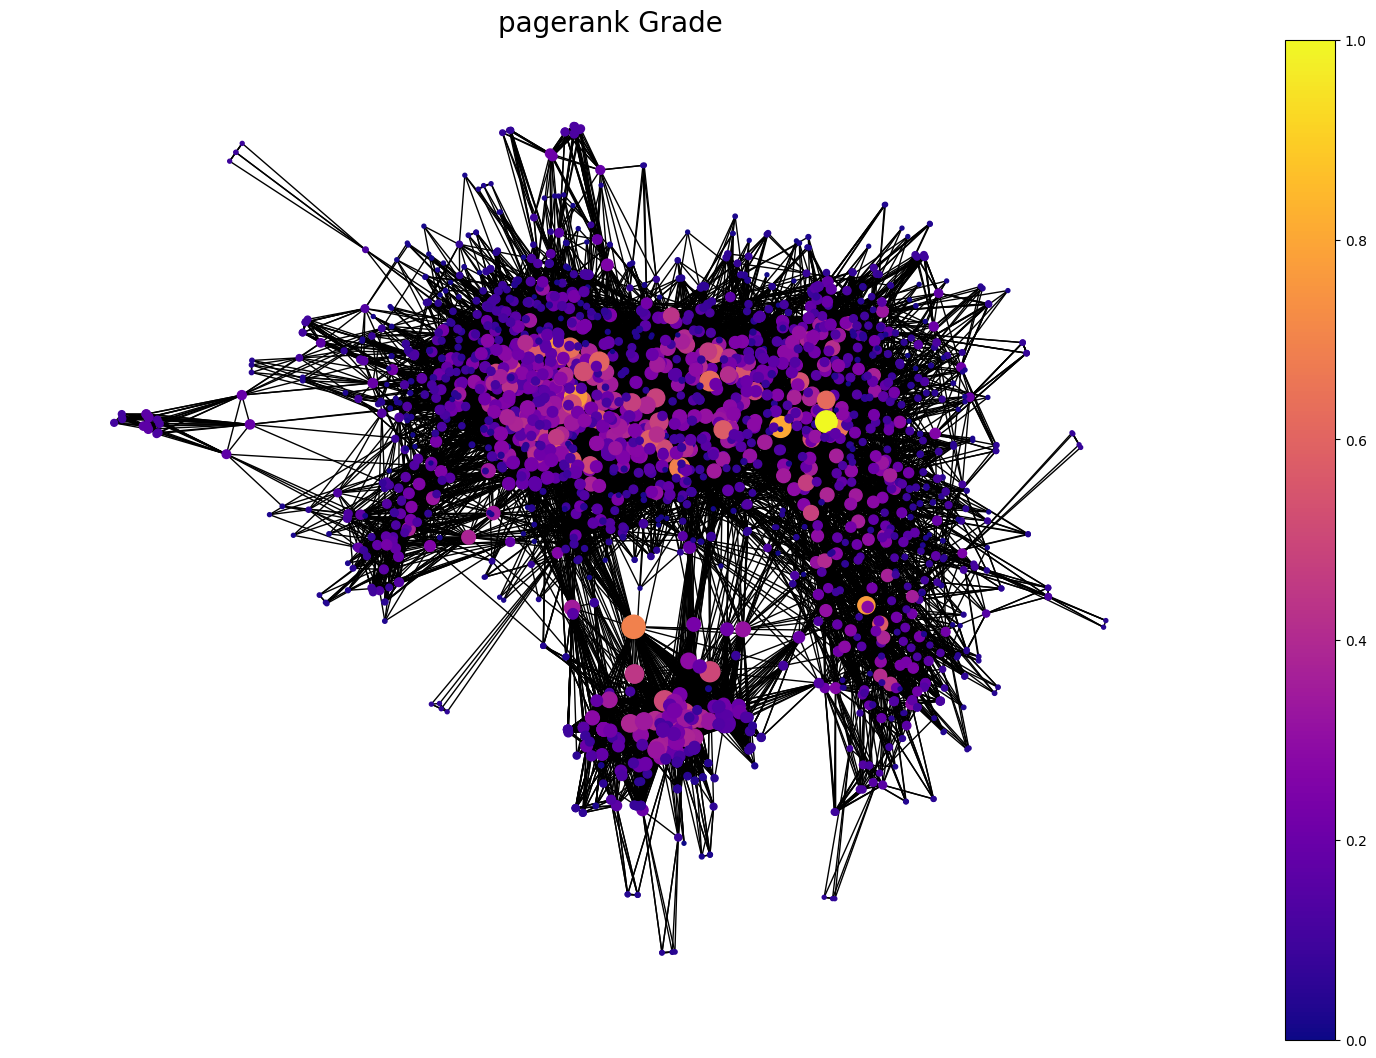

In [ ]:
crear_grafico_colores(gestion,pagerank,"pagerank Grade")

In [29]:
# Calcular el coeficiente de agrupamiento para cada nodo
clustering = nx.clustering(gestion)

clustering_ordenado = [(k,v) for k,v in sorted(clustering.items(), key=lambda item:item[1], reverse=True)]
#print(clustering_ordenado)

print("669 nodos con mejor ranking")
clustering_ordenado[:669]

669 nodos con mejor ranking


[('EGVLZUBWIBCWLOZFBOIQT4DEXY', 1.0),
 ('SPVWKS5FLNASBMXV5IFD4F73V4', 1.0),
 ('Q6HAYQD3LFCV3KJL45YFF6VENM', 1.0),
 ('CXMGYR5P7BFLJM2XDTOQ2YTONM', 1.0),
 ('V2OZXJX5EJHJRORKDP6MUEXR2Q', 1.0),
 ('MEMU26A4JRFZZAABXGMYPAOLAE', 1.0),
 ('SK2CLDTFGBDBZOHQI7T5STE6SY', 1.0),
 ('CGWFNYIFDZAXPHLYDJP5LZVE6Y', 1.0),
 ('LF25CA6FU5FJTGCMFMF7RWCHPA', 1.0),
 ('FNP5MYYJIVEBZOKFBWDJY7JXMM', 1.0),
 ('4FGF3VWM6JHIHO4LMZ6RPMM2SU', 1.0),
 ('IXKCBDK5UBH2NEBUER7L2RGJCQ', 1.0),
 ('7T5G4NBXQJGCDP4IIVLH7VN5ME', 1.0),
 ('KSBUPNH5LNFYDDOT7QO37JPZGY', 1.0),
 ('QJHHCBQ7IJCCVFWHZQL7NCNVSQ', 1.0),
 ('KCDM25OMG5CEZIYWADYCCYOVVU', 1.0),
 ('5RVV3TS53JH7DDUEPHHDPIXOCE', 1.0),
 ('6HUKYM44WFBSPFFRE7L75GA5NM', 1.0),
 ('A2Q3FNR34VAI3FR3C3FXGYROHM', 1.0),
 ('OYQK2N4OZFG3DPPASPOSGIN22Q', 1.0),
 ('I2VCHGUB5ZD5TLEJ5HILCQMCCE', 1.0),
 ('7TO5AV35AJF7DKRDBRIU5YIAIA', 1.0),
 ('33XBFU6GLVFQFGBOP7BZFH4STQ', 1.0),
 ('WOZHVZEUL5BMDNEL55KTX2AVPU', 1.0),
 ('7N4XVNQ3UBEIFHN3JKRIEGNDJA', 1.0),
 ('H45LNPU65FFBPL3ITCDPAIG3IQ', 1.0),
 ('LM6VX3LQD

In [30]:
clustering_atributos = obtener_atributos(gestion,clustering_ordenado,20)
clustering_atributos

,categoria,subcategoria,tipo_contenido,autor,titulo,caracteres
0,Mix,Tendencias mix,free,Redacción Mix,La película que necesitó a un agente de la CIA para que el protagonista soportara las extensas horas de maquillaje y que ya puedes ver en Amazon Prime Video,3191
1,Mix,Respuestas,free,Redacción Mix,El garaje de 6 millones de dólares que quiere comprar Edwin Castro,2168
2,Mix,Tendencias mix,free,Redacción Mix,La inteligencia artificial presentó a los personajes de Disney como si fueran humanos,2104
3,Mix,Tendencias mix,free,Redacción Mix,Una inteligente sátira: de qué trata “American Fiction” y cómo ver la película de Cord Jefferson,2506
4,Mix,Respuestas,free,Ronie Bautista,"Temblor en Colombia hoy, 7 de diciembre – último reporte de sismicidad por el SGC",1063
5,Economia,Empresas,metered,Agencia EFE,Automotriz china Chery confirma que está preparando de nuevo su salida a bolsa,1826
6,Peru,Politica,free,Redacción Gestión,Congreso elegirá el jueves 14 al nuevo magistrado del Tribunal Constitucional,2757
7,Peru,Politica,free,Redacción Gestión,Recorte de sueldo: Comisión de Ética archiva denuncias contra María Acuña e Hilda Portero,2475
8,Peru,Politica,metered,Redacción Gestión,Nuera del congresista José María Balcázar fue nombrada en la Fiscalía tras reunión con asesores de Benavides,4561
9,Peru,Politica,free,Redacción Gestión,Presidenta Boluarte: APEC 2024 tendrá una agenda con enfoque inclusivo y sostenible,3421


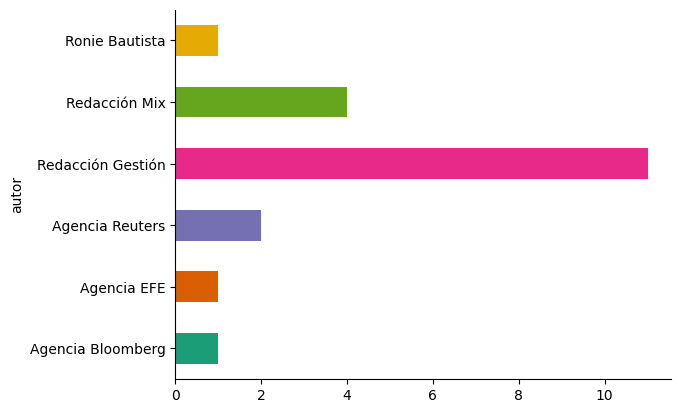

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
clustering_atributos.groupby('autor').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

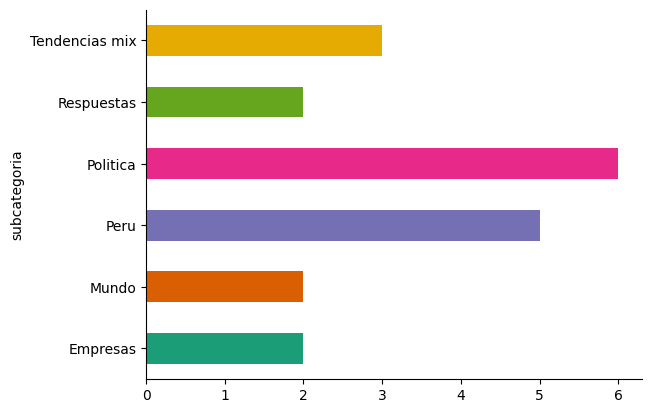

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
clustering_atributos.groupby('subcategoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

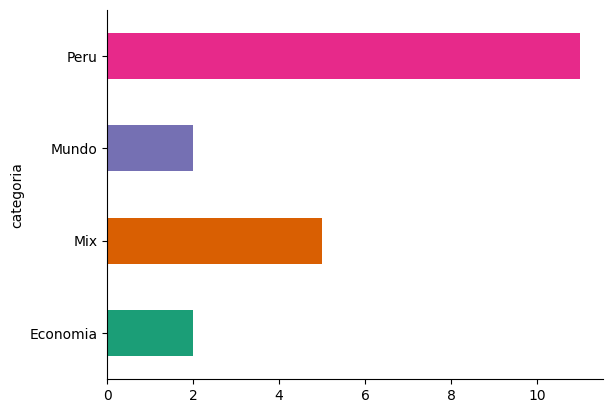

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
clustering_atributos.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

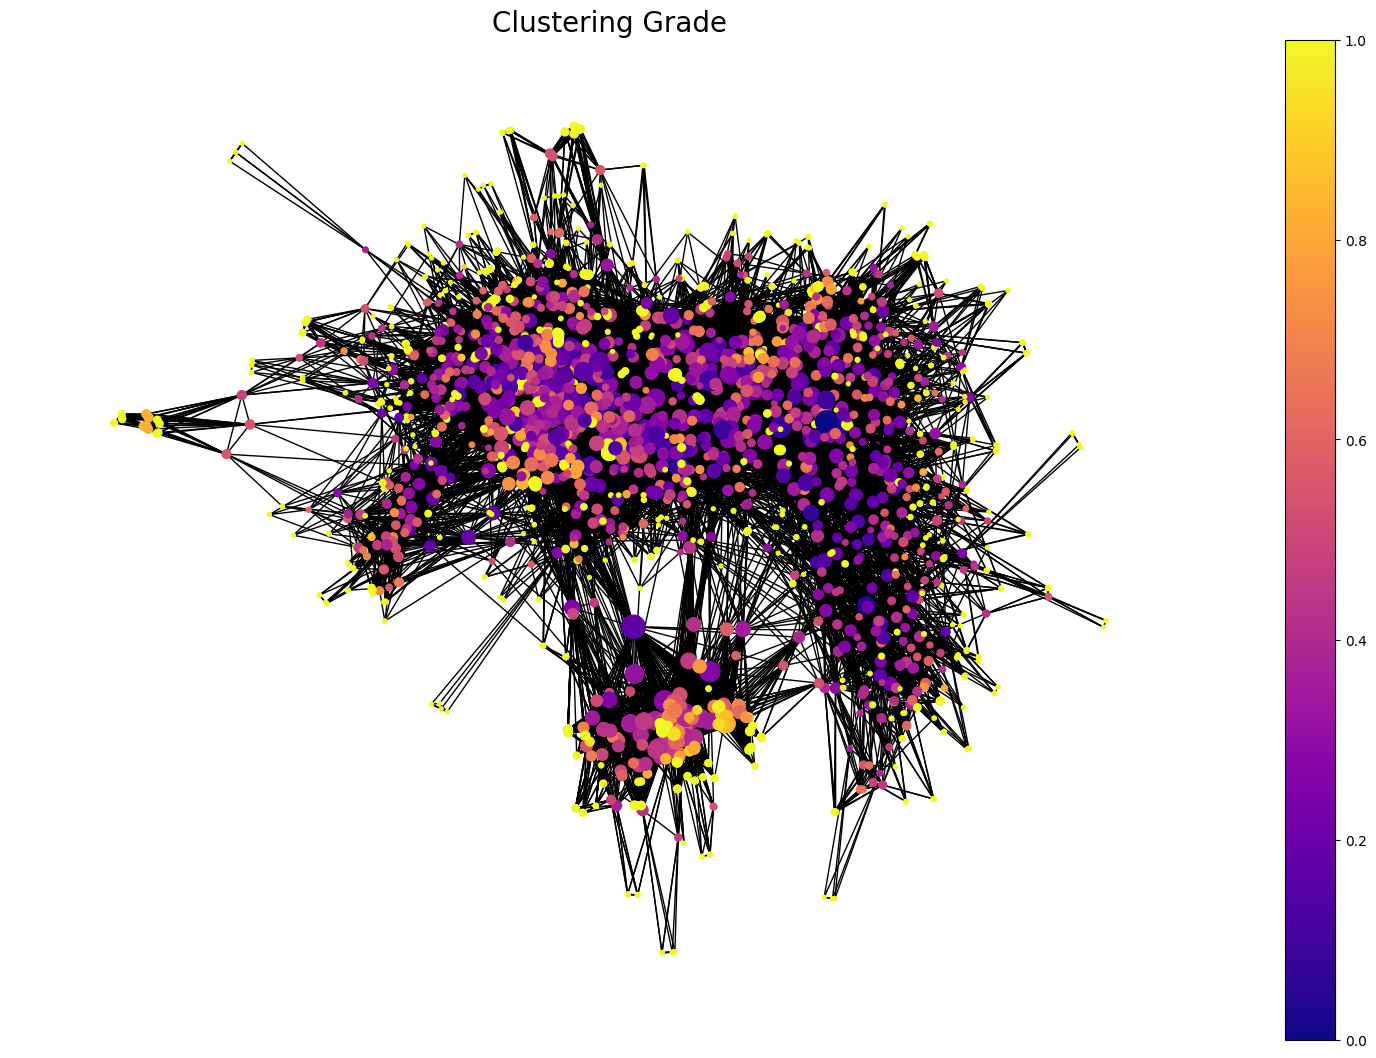

In [ ]:
crear_grafico_colores(gestion,clustering,"Clustering Grade")